# 数据分析概述

继蒸汽技术革命，电力技术革命，信息技术革命之后，当前人类社会正在步入第四次工业革命（科技革命）。以大数据驱动的人工智能是第四次工业革命的重要技术，故而有人认为人类正在从信息技术(IT)时代走向数据技术（DT）时代。数据是基础，是 DT 时代的石油，没有数据一切无从谈起；而数据分析则是 DT 时代的一把利剑，没有好的数据分析，数据只是一堆数字而已。

数据无处不在，在信息技术革命时代，生成的数据呈指数增长。在计算机中数据存储最小单位是字节（Byte），下面列出更大的数据存储单位：
- 1 KB（Kilobyte） 表示 $1024$ 字节，即$2^{10}$ 字节；
- 1 MB（Megabyte）表示 $1024*1024$字节，$2^{20}$ 字节；
- 1 GB（Gigabyte）表示 $2^{30}$ 字节；
- 1 TB（Terabyte） 表示 $2^{40}$ 字节；
- 1 PB（Petabyte） 表示 $2^{50}$ 字节；
- 1 EB（Exabyte） 表示 $2^{60}$ 字节；
- 1 ZB（Zettabyte） 表示 $2^{70}$ 字节；
- 1 YB（YottaByte） 表示 $2^{80}$ 字节；

据互联网数据中心（IDC）报告称，全球数据总量已经达到 ZB 量级，并且还以每年 40% 的速度在增长。这也意味着，世界上现存数据有一半都是过去两年内产生的。

世界上的企业或组织每日生成的数据量日益增大，日常分析的数据从 MB 到 GB 不等，而且还在不断增加。数据如此之多，产生速度如此之快，如何从庞大数据中快速挖掘出有价值信息，就成为一个企业或组织的竞争优势。从数据中探索、分析、挖掘有价值信息的数据分析师或数据科学家，就成为企业发挥大数据力量的重要因素。据国际知名调研与咨询服务公司 Gartner 预测，围绕大数据的分析应用，将会创造数百万个工作岗位。

本书主要介绍在 Python 数据分析过程中，会涉及的基本知识以及 Python 数据分析栈的使用。

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 剑桥的苹果树与黑洞

数据分析并不是信息技术革命的新产物，而是古而有之。

> 剑桥大学的三一学院门口有一棵很小的苹果树，早春的季节里，树叶刚刚吐芽，隐隐地泛着绿色，和整个剑桥的无限春光相比，实在是不起眼。但在剑桥大学读书的人，都会把朋友带到这里来，老远就指着它郑重地介绍说，就是这颗小苹果树的祖宗老苹果树，在某一个夏天把果实掉到了牛顿的脑袋上。

<img src="../images/overview_appletree.jpg" style="zoom:80%" />

一个阳光和煦的午后，微风吹过，一个摇摇欲坠的苹果落到正在晒太阳的牛顿身上。牛顿捡起苹果，并没有吃，却陷入沉思之中...。数据只有一条：苹果落下。牛顿却从中发现万有引力定律：
$$
F = G \frac{m_1 m_2}{r^2}
$$

下面创建一个数据文件，文件中的数据是抛掷一个物体，不同的初始速度（米/秒）对应则飞出地球或落回地球：

In [23]:
%%writefile object_velocity_earth.csv
name,velocity,earth
苹果,0.1,falldown
网球,50,falldown
羽毛球,63,falldown
大炮,600,falldown
子弹,850,falldown
鬼怪,2370,falldown
防空导弹,3000,falldown
神7,7820,flyout
新视野号,16260.0,flyout

Overwriting object_velocity_earth.csv


使用 Pandas 库读取文件：

In [24]:
df = pd.read_csv('object_velocity_earth.csv')
df

,name,velocity,earth
0,苹果,0.1,falldown
1,网球,50.0,falldown
2,羽毛球,63.0,falldown
3,大炮,600.0,falldown
4,子弹,850.0,falldown
5,鬼怪,2370.0,falldown
6,防空导弹,3000.0,falldown
7,神7,7820.0,flyout
8,新视野号,16260.0,flyout


可以看出，不同的抛掷速度只有两种结果，飞出地球或落回地球：

In [25]:
df['earth'].value_counts()

falldown    7
flyout      2
Name: earth, dtype: int64

最后使用 matplotlib 库绘制抛掷速度与最终结果的关系图：

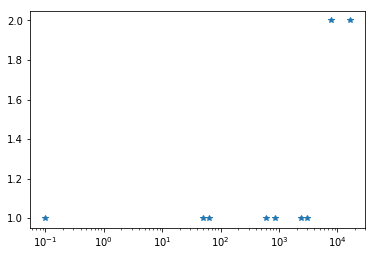

In [26]:
status2value = {'falldown': 1.0, 'flyout': 2.0}
df['result'] = df['earth'].map(status2value)
plt.semilogx(df['velocity'], df['result'], '*')

从图中大概可以猜测出，当物体抛掷的初始速度大于介于 3000 与 7820 米每秒之间的某个速度时，该物体就会飞出地球，这个速度成为第一宇宙速度。显然当数据足够多时，就能从中得到精确的第一宇宙速度。

在早期科学研究中，通过极少量的试验与数据，加上科学家天才的推理能力，就会获得科学重大发现。随着科学的大发展，当代科学研究中会使用大量的数据。最近国际上首次发布了黑洞照片（如下下图），恰好作者曾经从事过这方面的工作，站在数据分析的角度上多啰嗦一下。黑洞照片的拍照冲洗会使用称为VLBI的干涉测量技术，地球上的八台望远镜同时对着黑洞进行观测，一次观测会产生总共 5 PB 的数据，望远镜的数据进行干涉处理和积分，得到大于 500GB 的数据，最后进行各种数据处理与成图，得到合成一幅大约 183 MB 的图像文件。可见数据处理或者数据分析都是从海量数据中，通过处理与分析得到有价值信息。

<img src="../images/overview_blackhole.jpg" style="zoom:60%" />

## 约翰·斯诺（John Snow）与瘟疫调查

在伦敦的宽街（Broad street）上静静地立着一个不再流水的水龙头，在拐角处还有一个名为约翰·斯诺(John Snow)咖啡店。可以悠闲地喝着咖啡，望着安静的水龙头，惬意的很。
<img src="../images/John_Snow_memorial_and_pub.jpg" style="zoom:60%" />

然而回到 19 世纪中叶，那确是一片恐慌的死寂之城。在1831年到1854年，伦敦发生了多次霍乱（cholera）疫情：
- 1831～1832年，伦敦 6,536名 市民丧生，英国 2.2万 人死亡。
- 1848～1849年，伦敦死亡 14,137 人； 英国死亡人数超过7.2万。
- 1853～1854年，在短短的10天里，伦敦死亡超过500人，最后共死亡10,738人。

约翰·斯诺（John Snow）是当时英国的麻醉学家、流行病学家，因为对 1854 年伦敦霍乱爆发的研究，被认为是流行病学研究的先驱。
<img src="../images/overview_JonhnSnow.jpg" style="zoom:100%" />

对于霍乱疫情，当时众说纷纭。有人认为是资产阶级压迫工人阶级造成的，改变英国工人阶级生活；有人认为环境问题，使用除臭剂来除臭；有人认为要讲卫生，清扫城中垃圾，疏通排水管道。确实是这么做的，打扫垃圾，并倒进河里，结果疫情更严重了。

约翰·斯诺第一次使用统计的方法来尝试解决问题，其过程与现状的统计调查方法差不多。首先调查走访，然后收集数据，进行统计比对。统计比对结果如下：

|供水公司   | 家庭数  |  因霍乱死亡人数  |   每1万户死亡人数 |
|:---------|--------|---------------|----------|
|S&V	  |40,046	|1,263	|315|
|Lambeth  |	26,107	|98	   |37|
|Rest of London	|256,423	|1,422	|59|

也就是使用供水公司`S&V`的居民死亡率显著。在 1849 年 8 月，约翰·斯诺出版《论霍乱的传染方式》一书，明确指出：
> 霍乱是由被污染的水传播。  
> 停止使用供水公司S&V的水!

这也是第一次使用数据分析来尝试解决现实中的问题。数据分析的结果就是：要活命就关掉水龙头。

遗憾的是，直到约翰·斯诺于 1858 年去世，也没有人采用其建议，其反驳理由是：
- 缺乏科学依据
- 没有足够的证据

在 1883 年，罗伯特科赫发现霍乱的病原体是霍乱弧菌，并成功找到霍乱弧菌交叉感染的途径——经过水、食物，衣物等用品的传播。这才证实约翰·斯诺的结论是正确的，是有科学依据的。

下面使用 Python 读取文件获取疫情死者与水龙头位置，并在一幅图中绘制出来：

In [9]:
# 疫情死者与水龙位置文件
deathsfile = os.path.join('../data', 'deaths.txt')
pumpsfile = os.path.join('../data', 'pumps.txt')
deaths = pd.read_csv(deathsfile)
pumps = pd.read_csv(pumpsfile)
print(deaths.head())

print(pumps.head())

           X          Y
0  13.588010  11.095600
1   9.878124  12.559180
2  14.653980  10.180440
3  15.220570   9.993003
4  13.162650  12.963190
           X          Y
0   8.651201  17.891600
1  10.984780  18.517851
2  13.378190  17.394541
3  14.879830  17.809919
4   8.694768  14.905470


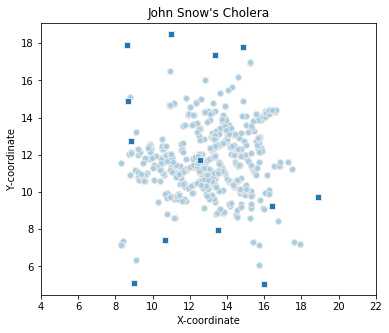

In [10]:
# 使用色盲友好的颜色
import matplotlib.cm as cm
deaths_c, pumps_c, *_ = cm.Paired.colors

plt.figure(figsize=(6, 5))
plt.plot(deaths['X'], deaths['Y'], marker='o', lw=0, mew=1, mec='0.9', ms=6, color=deaths_c)
plt.plot(pumps['X'], pumps['Y'], marker='s', lw=0, mew=1, mec='0.9', color=pumps_c, ms=6)
plt.axis('equal')
plt.xlim((4.0, 22.0))
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title("John Snow's Cholera")
plt.show()

从上图可以看出，死者与水龙头位置存在关联关系。图中心的水龙头位置，就是现在伦敦宽街水龙头模型的所在。

## 数据分析与科学研究

从上面数据分析与科学研究的案例可看出：数据分析（统计）能够发现问题、解决问题，但不一定能够触及背后的科学原理，容易造成缺乏科学依据的问题；科学研究能够理解问题、彻底解决问题，但难于发现，依赖科学大家的神来之笔。

例如，对于如下的麦克斯韦方程：
$$\nabla\cdot\vec{B}=0$$
$$\nabla\cdot\vec{D}=\rho$$
$$\nabla\times\vec{H}=\vec{J} + \frac{\partial \vec{D}}{\partial t}$$
$$\nabla\times\vec{E}=- \frac{\partial \vec{B}}{\partial t}$$

笔者认为，数据分析（人工智能）很难得到麦克斯韦方程，还得依靠科学家的天才研究。但另一方面，科学研究会用到大量的数据分析，离开数据分析也很难有啥发现。

在商业、工业或社会中，人们期望能够快速的发现问题、解决问题，并不急需背后的原理解释，故而数据分析（人工智能）在这些领域得到广泛应用。

## 数据分析的内容与过程

百度百科对数据分析的定义为：
> 数据分析是指用适当的统计分析方法对收集来的大量数据进行分析，提取有用信息和形成结论而对数据加以详细研究和概括总结的过程。在实用中，数据分析可帮助人们作出判断，以便采取适当行动。  

也就是说，数据分析的目的是把隐没在一大批看来杂乱无章的数据中的信息集中、萃取和提炼出来，以找出所研究对象的内在规律。

有些人或许没有感觉到数据分析的存在，但实际上数据分析无处不在，早已渗透到每个人的日常生活中。当登录京东或者淘宝进行购物时，呈现在面前的是个性化推荐的商品页面。通过分析个人在银行账户的收入、余额及其变化信息，会作为是否能够贷款和贷款多少的依据。甚至自己每日的行程、消费、见得朋友，打的电话，聊天内容都可能会被有心人收集，作为个人行为的预测分析。

对于企业来说，常见的数据分析包括：
- 客户分析
- 营销分析
- 社交媒体分析
- 设备管理
- 欺诈行为检测

随着社会的公开，透明与开放，个人也能够访问很多数据。了解掌握数据分析，从杂乱无章的数据中，提炼出自己对社会的认知，也是一件蛮不错的事情。

典型的数据分析的过程包括如下：
1. 确定目标：大致确定数据分析领域，以及问题分析报告的目标
2. 数据收集：从各个数据来源收集整理数据（爬虫与购买）；
3. 数据清洗：对收集的数据进行质量检查；对数据进行标识整理、把数据结构化。
4. 数据探索：通过探索来熟悉数据，查看数据，通过绘图、拟合，特征量计算等来查看数据规律。
5. 分析与建模：在探索分析基础上，提出可能的模型；通过分析来选定模型，进一步对选定模型进行测试验证。
6. 模型评价与优化：评价模型优劣，对模型进行优化。
7. 模型应用：在真实环境中，部署获得模型进行实际应用。

本课件并不介绍如何收集数据，以及数据建模和模型部署，而是通过 Python 数据分析库 Numpy、Scipy、Pandas、Matplotlib等，来介绍数据的清洗、探索、规整、分析等操作。